# Fixed points of 2D linear systems

In [1]:
import os, re, sys, IPython, pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve


### 2D Linear System

$$\frac{dx_1}{dt} = a_{11}x_1 + a_{12}x_2$$
$$\frac{dx_2}{dt} = a_{21}x_1 + a_{22}x_2$$

$$a = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}  \end{bmatrix}$$



In [2]:
from scipy import integrate
p0= [1,1,1,1]
def linsys (x, t=0, p=p0):
    a11= p[0]
    a12= p[1]
    a21= p[2]
    a22= p[3]
    return np.array([a11*x[0] + a12*x[1], a21*x[0] + a22*x[1]])


## Nullclines

$$\frac{dx_1}{dt} = a_{11}x_1 + a_{12}x_2 = 0$$
$$ x_2 = \frac{-a_{11}}{a_{12}}x_1$$
$$\frac{dx_2}{dt} = a_{21}x_1 + a_{22}x_2 = 0$$
$$ x_2 = \frac{-a_{21}}{a_{22}}x_1$$


In [3]:
def phaseplane_linear ( a, t_end=1,x01= [1,1],x02= [0,-0.5],filename='pp_lin.pdf'):

    # Compute eigenvalues
    w,v= np.linalg.eig(a)
    x_fp=np.array([0,0])

    # Compute trajectories
    t= np.linspace(0,t_end,1000)
    p=a.flatten()
    sol1 =  integrate.odeint(linsys, x01, t, args=(p,))
    sol2 =  integrate.odeint(linsys, x02, t, args=(p,))


    fig = plt.figure(figsize=(12,6))
    ax1= fig.add_subplot(1,2,1)
    ax2= fig.add_subplot(1,2,2)

    ax1.plot(t, sol1[:,0], 'r-', label=r'$R$')
    ax1.plot(t, sol1[:,1], 'b-', label=r'$J$')
    ax1.set_xlabel('time')
    ax1.set_ylabel('number')
    #ax1.set_title('Trajectories')
    ax1.legend(loc='best')
    ax1.grid()
    ax1.set_xlim(t[0],t[-1])

    # Plot nullclines and fp
    x1= np.linspace(-2,2,20)
    x2= np.linspace(-2,2,20)
    # Compute nullclines
    x1_null = lambda x1: -a[0,0]/a[0,1]*x1
    if (a[1,1]==0): # spl case
        x2_null_x = np.zeros(20)
        x2_null= x2
    else:
        x2_null_x = x1
        x2_null = -a[1,0]/a[1,1]*x1

    ax2.plot(x1, x1_null(x1),'r--', label="$R$ nullcline")
    ax2.plot(x2_null_x, x2_null,'b--', label="$J$ nullcline")
    ax2.plot([0], [0], linewidth=0, color='black', marker='o', markersize=7, markerfacecolor='white')
    ax2.set_xlim(x1.min(),x1.max())
    ax2.set_ylim(x2.min(),x2.max())

    # Plot trajectories
    ax2.plot(sol1[:,0], sol1[:,1], color='purple')
    ax2.plot(sol1[0,0], sol1[0,1], linewidth=0, color='black', marker='o', markersize=5, label='start')
    ax2.plot(sol1[-1,0], sol1[-1,1], linewidth=0, color='black', marker='s', markersize=5,label='end')
    ax2.plot(sol2[:,0], sol2[:,1], color='purple')
    ax2.plot(sol2[0,0], sol2[0,1], linewidth=0, color='black', marker='o', markersize=5)
    ax2.plot(sol2[-1,0], sol2[-1,1], linewidth=0, color='black', marker='s', markersize=5)

    ax2.set_xlabel(r'$R$')
    ax2.set_ylabel(r'$J$')

    # Show vector field
    X1, X2 = np.meshgrid(x1,x2)   # create grid
    DX1, DX2 = linsys([X1, X2],p=p) # compute derivs on grid
    M= (np.hypot(DX1,DX2)) # normalize derivs
    M[M==0]= 1             # avoid divide by 0
    #normalize arrows
    DX1 /= M
    DX2 /= M
    ax2.quiver(X1, X2, DX1, DX2, M, pivot='mid')

    #ax2.set_title('Phase Plane with Nullclines')
    ax2.legend(loc='best')
    #ax2.set_xlim(0,1.2)
    #ax2.set_ylim(0,3)
    ax2.grid()


    print('a={}'.format(a))
    print('eigenvalues are {}'.format(w))
    fig.savefig(filename,facecolor='white')

Trace

$$ \tau = a_{11} + a_{22}$$

Determinant

$$ \delta = a_{11} a_{22} - a_{12} + a_{21}$$

Eigen values

$$ \lambda_{1, 2} = \frac {1}{2} (\tau \pm \sqrt{\tau^2 - 4\delta})$$

![convert notebook to web app](https://www.researchgate.net/publication/346614443/figure/fig11/AS:964859927728140@1607051941592/Classification-of-fixed-points-for-two-dimensional-nonlinear-systems-As-a-function-of.png)


## Let's talk about love

25 years of Titanic, and Valentine's just this week, I think its time we talk about love!

Jack and Rose, are in love but Jack is a fickle. The more Rose loves him, the more Jack wants to run away and hide, basically he did decide to not float with her on that door. But when Rose backs off, Jack begins to find her strangely attractive.

$$ \frac{dR}{dt} =  a J$$
$$ \frac{dJ}{dt} =  -bR $$

Love is in the air when $R = J$ or let's just say the feelings are mutual!

Let's find the eigen trace and determinant!

Can this truly workout?
a=[[ 0  2]
 [-3  0]]
eigenvalues are [0.+2.44948974j 0.-2.44948974j]


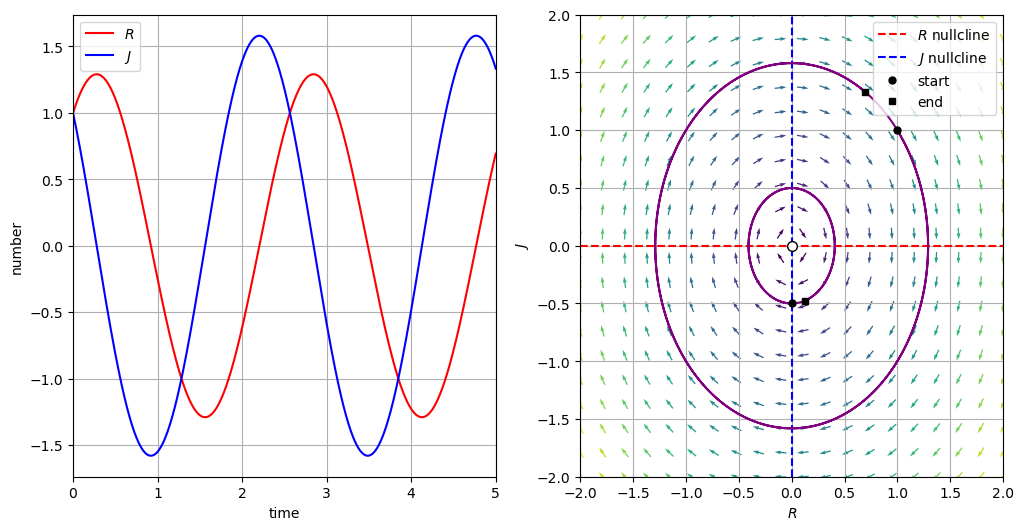

In [5]:
print('Can this truly workout?')
a= np.array([[0, 2],[-3, 0]])
phaseplane_linear(a, t_end=5, filename="center.pdf")


## The Cautious Lovers

$$ \frac{dR}{dt} =  a R + b J$$
$$ \frac{dJ}{dt} =  bR + aJ $$
$a < 0, b > 0$

They each try to avoid throwing themselves at the other and they both get excited by the other’s advances - the dating scene today!

Let's find the eigen trace and determinant!

Is Hinge the way to go? a^2 > b^2
a=[[-4  3]
 [ 3 -4]]
eigenvalues are [-1. -7.]


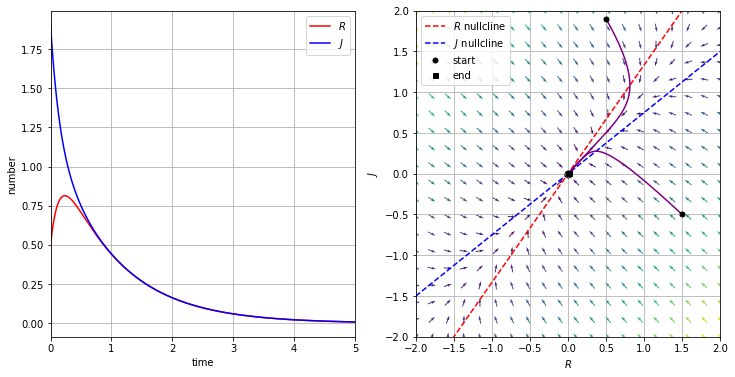

In [5]:
print('Is Hinge the way to go? a^2 > b^2')
a= np.array([[-4, 3],[3, -4]])
phaseplane_linear(a, t_end=5,x01= [0.5,1.9],x02= [1.5,-0.5], filename="stable.pdf")


Is Hinge the way to go? a^2 < b^2 
a=[[-2  5]
 [ 5 -2]]
eigenvalues are [ 3. -7.]


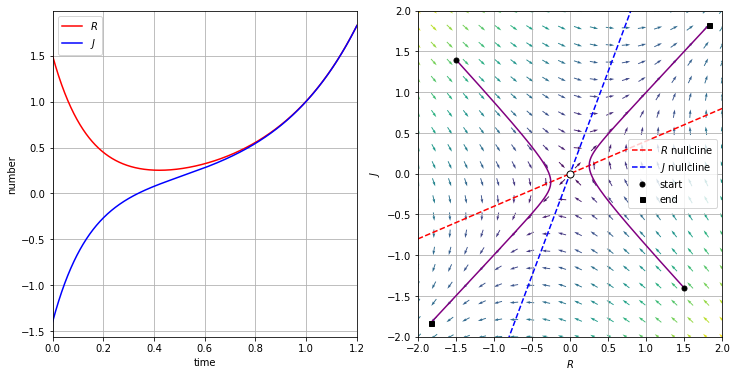

In [6]:
print('Is Hinge the way to go? a^2 < b^2 ')
a= np.array([[-2, 5],[5, -2]])
phaseplane_linear(a, t_end=1.2,x01= [1.5,-1.4],x02= [-1.5,1.4], filename="saddle.pdf")


They get there eventually! Both curves approach R = J line.

## Jack, please decide!

$$ \frac{dR}{dt} =   J$$
$$ \frac{dJ}{dt} =  -R + J $$

Rose loves Jack, but Jack is again fickle when Rose likes him, but at the same he does like her. Jack is a confused fellow!

Let's find the eigen trace and determinant!

$ \tau = 1$, $ \delta = 2$

Jack make up your mind
a=[[ 0  1]
 [-1  1]]
eigenvalues are [0.5+0.8660254j 0.5-0.8660254j]


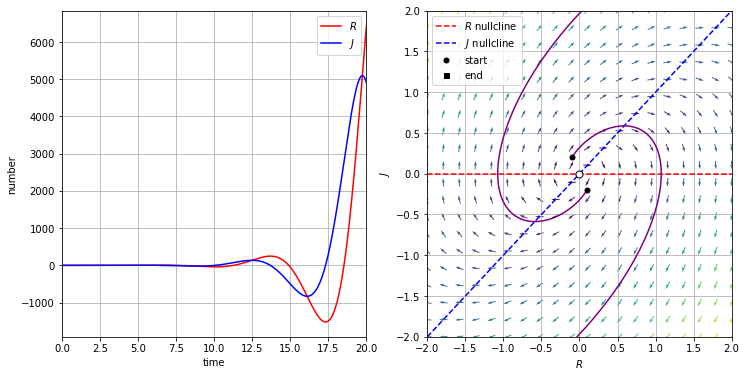

In [7]:
print('Jack make up your mind')
a= np.array([[0, 1],[-1, 1]])
phaseplane_linear(a, t_end=20,x01= [0.1,-0.2],x02= [-0.1,0.2], filename="unstable_spiral.pdf")

Jack make up your mind
a=[[ 0  1]
 [-1  1]]
eigenvalues are [0.5+0.8660254j 0.5-0.8660254j]


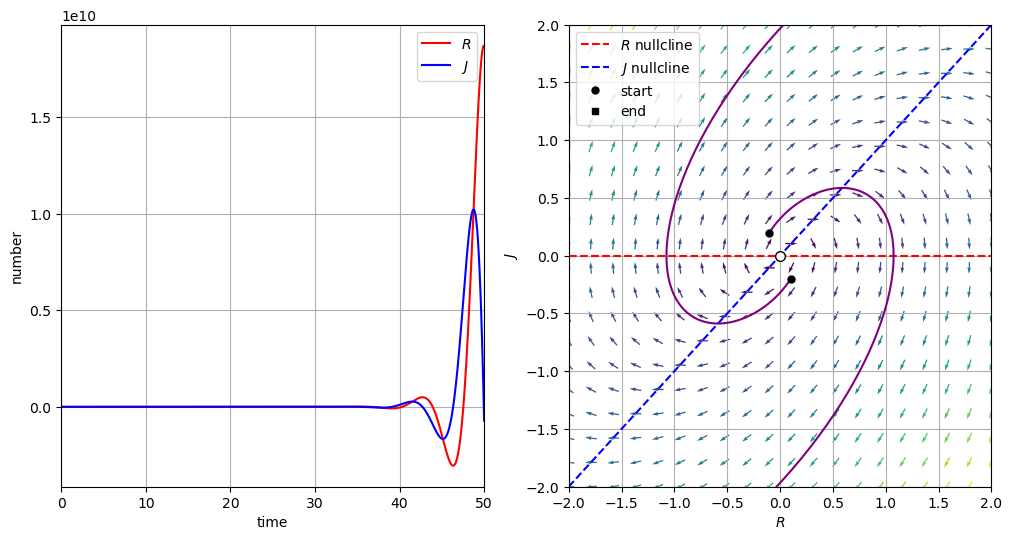

In [7]:
print('Jack make up your mind')
a= np.array([[0, 1],[-1, 1]])
phaseplane_linear(a, t_end=50,x01= [0.1,-0.2],x02= [-0.1,0.2], filename="unstable_spiral.pdf")

If you are confused, you really lose!

## You don't wanna know if you do like them!

$$ \frac{dR}{dt} =   aJ$$
$$ \frac{dJ}{dt} =  bR$$

Love me as much you can, but I would never wonder my own feelings for you.

I dont wanna know my feelings for you
a=[[0 4]
 [6 0]]
eigenvalues are [ 4.89897949 -4.89897949]


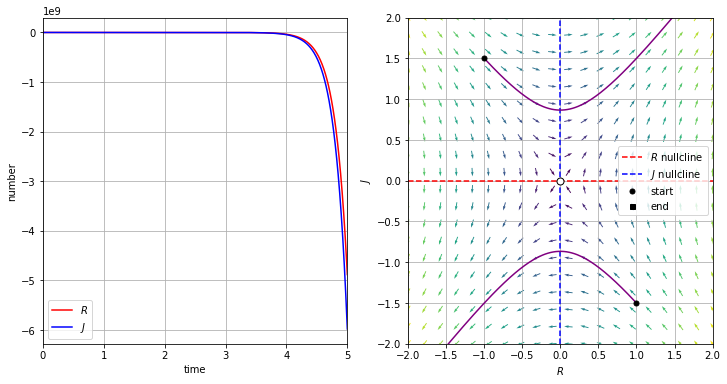

In [8]:
print('I dont wanna know my feelings for you')
a= np.array([[0, 4],[6, 0]])
phaseplane_linear(a, t_end=5,x01= [1,-1.5],x02= [-1,1.5], filename="saddle2.pdf")

I dont wanna know my feelings for you
a=[[0 4]
 [6 0]]
eigenvalues are [ 4.89897949 -4.89897949]


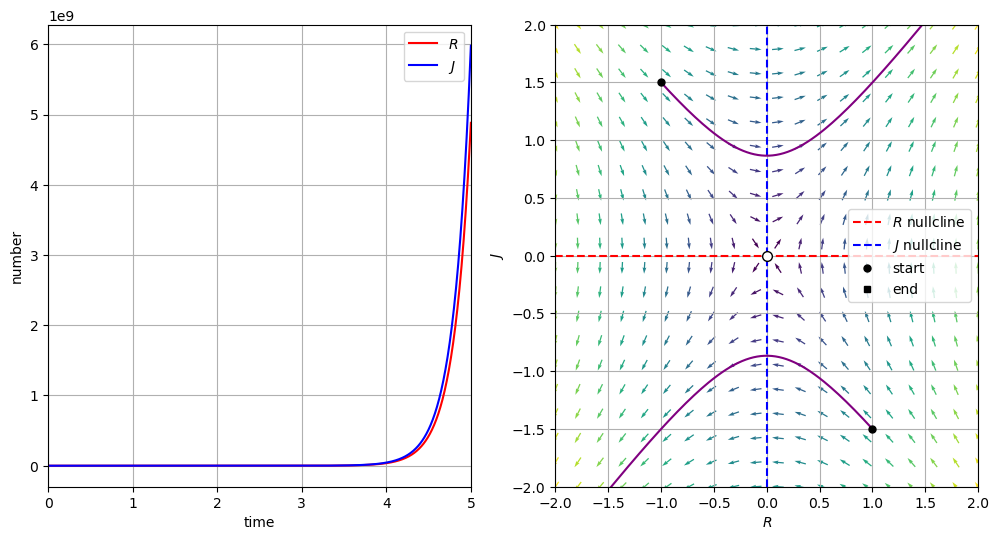

In [8]:
print('I dont wanna know my feelings for you')
a= np.array([[0, 4],[6, 0]])
phaseplane_linear(a, t_end=5,x02= [1,-1.5],x01= [-1,1.5], filename="saddle2.pdf")

They would be close!

## Do opposites atract?

$$ \frac{dR}{dt} =  a R + b J$$
$$ \frac{dJ}{dt} =  -bR + -aJ $$

Jack does not want Rose loving her nor does he want to love her.

Find determinat and eigen value
!

Do opposites really attract?
a=[[ 4  3]
 [-3 -4]]
eigenvalues are [ 2.64575131 -2.64575131]


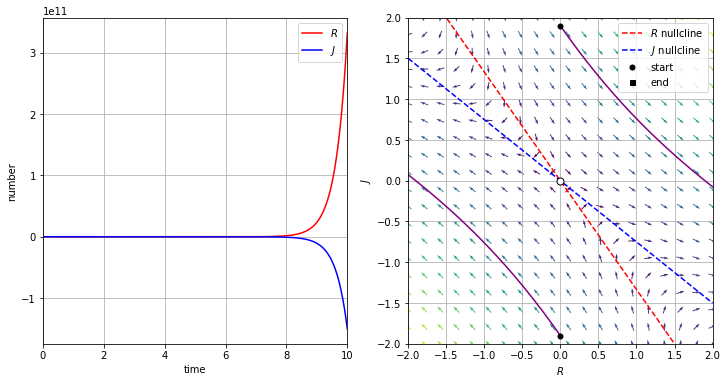

In [9]:
print('Do opposites really attract?')
a= np.array([[4, 3],[-3, -4]])
phaseplane_linear(a, t_end=10,x01= [0,1.9],x02= [0,-1.9], filename="saddle3.pdf")

Na, opposites, do not work out!

## Time to go all in!

$$ \frac{dR}{dt} =  a R + b J$$
$$ \frac{dJ}{dt} =  bR + aJ $$

Let me love you!
a=[[4 3]
 [3 4]]
eigenvalues are [7. 1.]
Unless
a=[[4 3]
 [3 4]]
eigenvalues are [7. 1.]


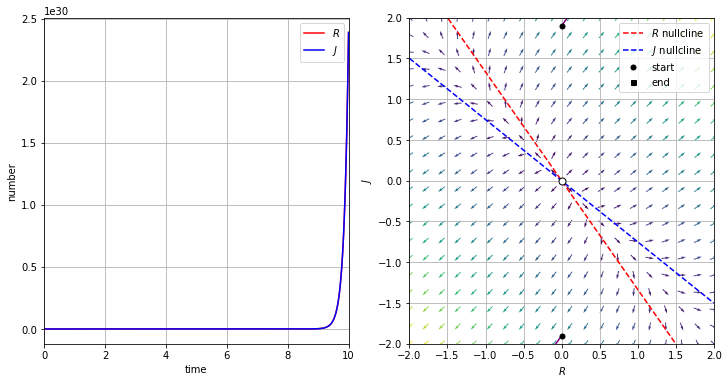

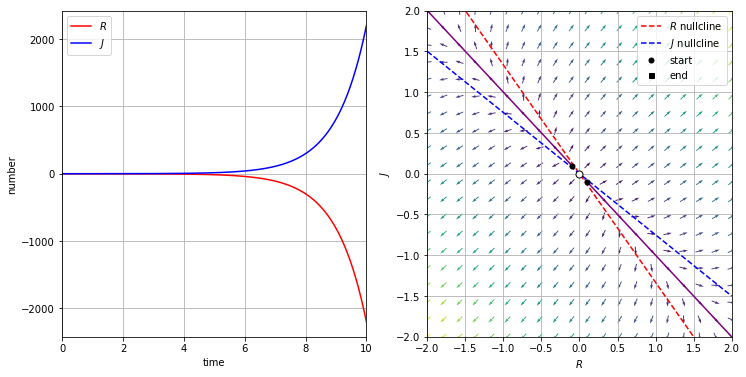

In [10]:
print('Let me love you!')
a= np.array([[4, 3],[3, 4]])
phaseplane_linear(a, t_end=10,x01= [0,1.9],x02= [0,-1.9], filename="in_love.pdf")

print('Unless')
a= np.array([[4, 3],[3, 4]])
phaseplane_linear(a, t_end=10,x01= [-0.1,0.1],x02= [0.1,-0.1], filename="unless.pdf")

## What if Rose says no

$$ \frac{dR}{dt} =  0 $$
$$ \frac{dJ}{dt} =  bR + aJ $$

No means no!
a=[[0 0]
 [3 4]]
eigenvalues are [4. 0.]


/var/folders/8m/s0rkpgrj22q_378yf6yhbm2m0000gn/T/ipykernel_66758/3782700075.py:31: RuntimeWarning: invalid value encountered in long_scalars
  x1_null = lambda x1: -a[0,0]/a[0,1]*x1


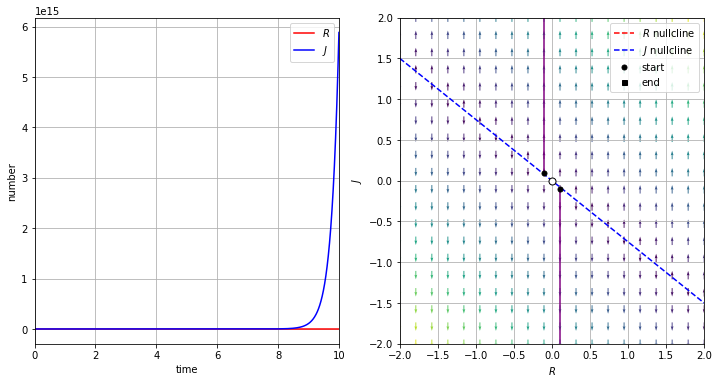

In [11]:
print('No means no!')
a= np.array([[0, 0],[3, 4]])
phaseplane_linear(a, t_end=10,x01= [-0.1,0.1],x02= [0.1,-0.1], filename="consent.pdf")

## More examples of linear stability analysis!

a=[[ 1 -1]
 [ 3  6]]
eigenvalues are [1.69722436 5.30277564]


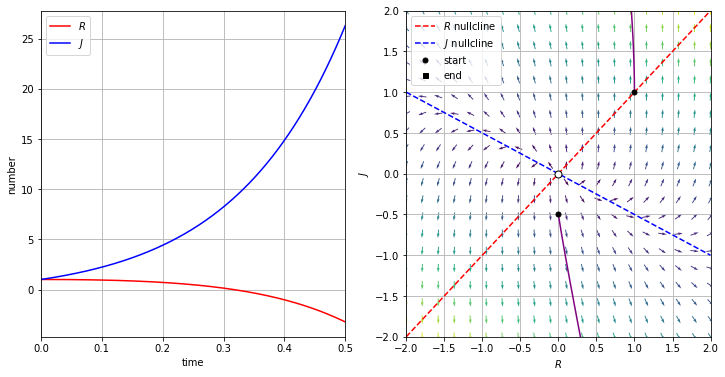

In [12]:
# Unstable example
a= np.array([[1, -1],[3, 6]])
phaseplane_linear(a, t_end=0.5, filename="lin_unstable.pdf")


In [13]:
y= lambda x: [0]*x
x=np.linspace(0,1,10)
y(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

a=[[-2  1]
 [ 1 -2]]
eigenvalues are [-1. -3.]


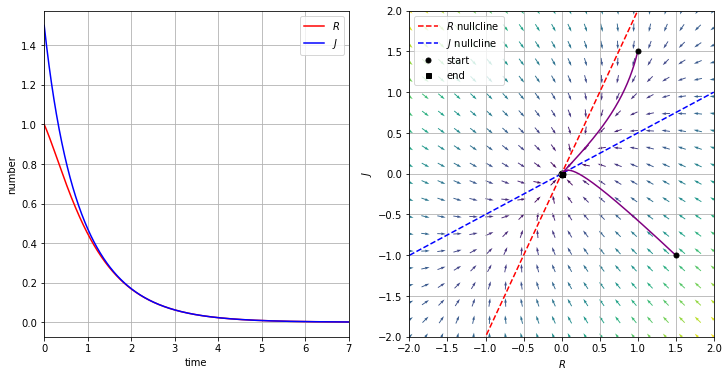

In [14]:
# Stable example
a= np.array([[-2, 1],[1, -2]])
phaseplane_linear(a, t_end=7, x01=[1,1.5],x02=[1.5,-1],filename="lin_stable.pdf")

a=[[0 1]
 [3 0]]
eigenvalues are [ 1.73205081 -1.73205081]


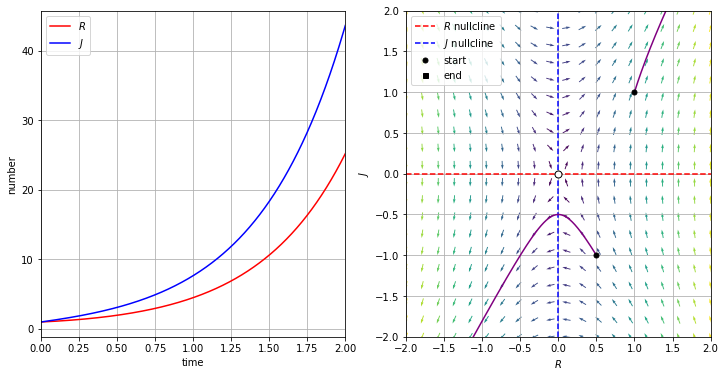

In [15]:
# Saddle example
a= np.array([[0, 1],[3, 0]])
phaseplane_linear(a, t_end=2, x02=[0.5,-1],filename="lin_saddle.pdf")

a=[[-2 -1]
 [ 4  1]]
eigenvalues are [-0.5+1.32287566j -0.5-1.32287566j]


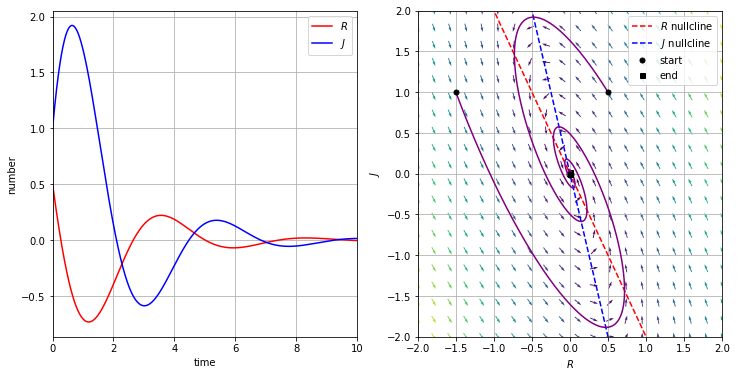

In [16]:
# Stable spiral
a= np.array([[-2, -1],[4, 1]])
phaseplane_linear(a,t_end=10,x01=[0.5,1],x02=[-1.5,1],filename="stable_spiral.pdf")

a=[[-0.75 -1.  ]
 [ 4.    1.  ]]
eigenvalues are [0.125+1.79843682j 0.125-1.79843682j]


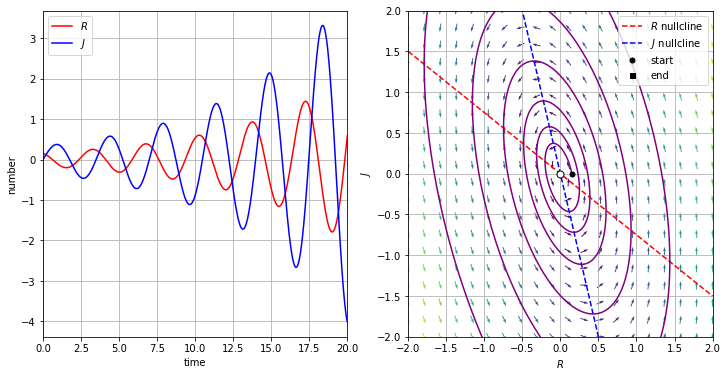

In [17]:
# Untable spiral
a= np.array([[-0.75, -1],[4, 1]])
phaseplane_linear(a,t_end=20,x01=[0.15,0],x02=[10,0],filename="unstable_spiral.pdf")

a=[[-1 -1]
 [ 5  1]]
eigenvalues are [0.+2.j 0.-2.j]


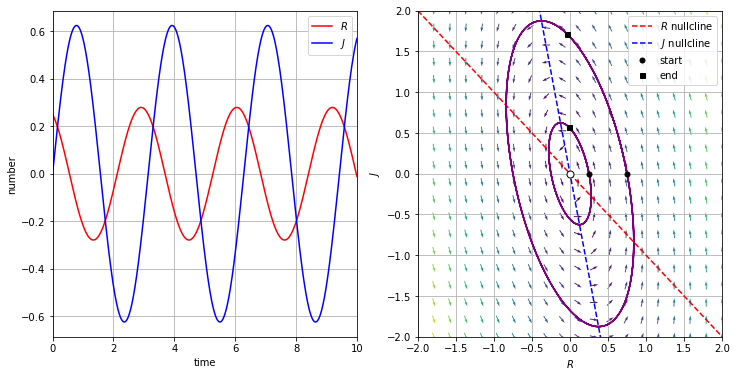

In [18]:
# Center -- metastable
a= np.array([[-1, -1],[5, 1]])
phaseplane_linear(a,t_end=10,x01= [0.25,0], x02=[0.75,0],filename="metastable.pdf")